<a href="https://colab.research.google.com/github/RabihSouiden/computacionParcial2/blob/main/Examen%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
#https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Telefon-a-M-vil-abonados-por-categor-a/nrst-mwx4
df = pd.read_csv('https://www.datos.gov.co/api/views/nrst-mwx4/rows.csv?accessType=DOWNLOAD')
df = df.sort_values(['AÑO','LÍNEAS ACTIVADAS'],ascending=False)
df

,AÑO,TRIMESTRE,PROVEEDOR,LINEAS EN SERVICIO,LINEAS PREPAGO,LINEAS POSPAGO,LÍNEAS ACTIVADAS,LÍNEAS RETIRADAS
104,2021,2,COMUNICACION CELULAR S A COMCEL S A,33843519,8078465,4798168,4976227,25765054
98,2021,1,COMUNICACION CELULAR S A COMCEL S A,33461107,7919053,5167591,4863057,25542054
121,2021,3,COMUNICACION CELULAR S A COMCEL S A,34355709,8391598,5556154,4746342,25964111
107,2021,2,COLOMBIA MOVIL S.A ESP,13023574,2099943,3464177,3481520,10923631
116,2021,3,COLOMBIA MOVIL S.A ESP,13971756,2616351,4017113,3068931,11355405
...,...,...,...,...,...,...,...,...
72,2018,4,AVANTEL S.A.S,2221618,640676,328503,227919,1580942
60,2018,4,EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP,486397,199351,73423,142032,287046
50,2018,4,LOGISTICA FLASH COLOMBIA S.A.S,555937,0,411125,67567,555937
5,2018,4,SUMA MOVIL S.A.S.,2460,0,1283,23,2460


1. Qué líneas activas existen por proveedor?

In [5]:
data = df.groupby(['AÑO', 'PROVEEDOR'])['LÍNEAS ACTIVADAS'].sum()
data = data.reset_index()
data = data.pivot(index='PROVEEDOR', columns='AÑO', values = 'LÍNEAS ACTIVADAS')
df2 = pd.DataFrame(data.to_records())
df2

,PROVEEDOR,2018,2019,2020,2021
0,ALMACENES EXITO INVERSIONES S.A.S.,279259.0,1102320.0,896629.0,400000.0
1,AVANTEL S.A.S,227919.0,964558.0,1743838.0,1094196.0
2,COLOMBIA MOVIL S.A ESP,2322019.0,9043101.0,7794050.0,9236290.0
3,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,1550269.0,4893818.0,5897240.0,3766559.0
4,COMUNICACION CELULAR S A COMCEL S A,4661702.0,17106011.0,18314799.0,14585626.0
5,"EMPRESA COLOMBIANA DE PROCESOS TECNOLOGICOS, T...",NaN,NaN,0.0,NaN
6,EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP,142032.0,449966.0,389313.0,212521.0
7,LOGISTICA FLASH COLOMBIA S.A.S,67567.0,559935.0,162644.0,61433.0
8,MERCANET SAS,0.0,0.0,0.0,0.0
9,PARTNERS TELECOM COLOMBIA SAS,NaN,NaN,NaN,418950.0


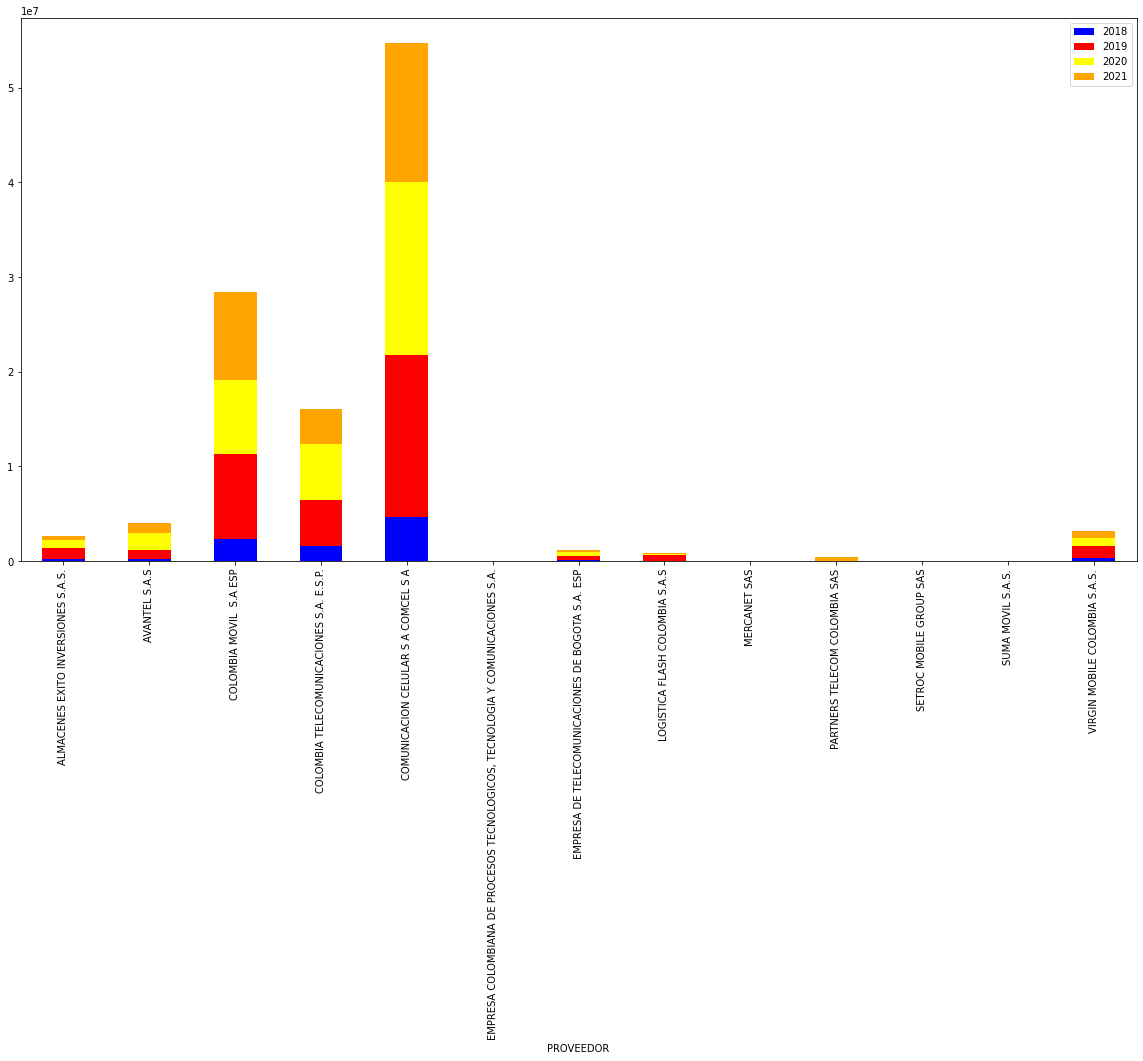

In [ ]:
df2.plot(x = 'PROVEEDOR', 
            y=['2018','2019', '2020', '2021'], 
            kind = 'bar', stacked=True,
            color = ['blue', 'red', 'yellow', 'orange'], 
            fontsize=10,
            figsize=(20,10))

2. Cuál es el mejor proveedor de distribución prepago y pospago cada año?

In [ ]:
df3 = df[df.PROVEEDOR =='COMUNICACION CELULAR S A COMCEL S A']
data2 = df3.groupby(['AÑO', 'PROVEEDOR']).agg(
     PREPAGO = ('LINEAS PREPAGO','sum'),
     POSPAGO = ('LINEAS POSPAGO','sum'),
     ).reset_index()
data2

,AÑO,PROVEEDOR,PREPAGO,POSPAGO
0,2018,COMUNICACION CELULAR S A COMCEL S A,6936693,5254089
1,2019,COMUNICACION CELULAR S A COMCEL S A,28711434,20451042
2,2020,COMUNICACION CELULAR S A COMCEL S A,30134560,20506818
3,2021,COMUNICACION CELULAR S A COMCEL S A,24389116,15521913


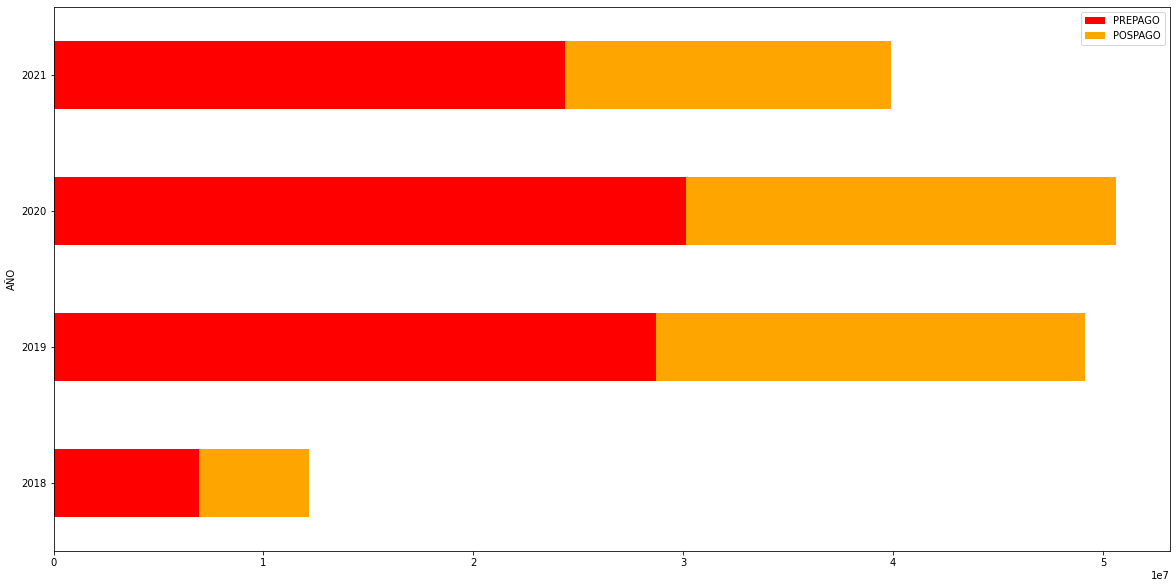

In [ ]:
data2.plot(x = 'AÑO', 
            y=['PREPAGO','POSPAGO'], 
            kind = 'barh', stacked=True,
            color = ['red', 'orange'], 
            fontsize=10,
            figsize=(20,10))

3. Cuales son las lineas retiradas por proveedor durante los 3 trimestres del año 2021?

In [ ]:
df4 = df[df.AÑO == 2021]
data3 = df4.groupby(['TRIMESTRE', 'PROVEEDOR'])['LÍNEAS RETIRADAS'].sum().reset_index()
data4 = data3.pivot(index='TRIMESTRE', columns='PROVEEDOR', values = 'LÍNEAS RETIRADAS')
df4 = pd.DataFrame(data4.to_records())
df4

,TRIMESTRE,ALMACENES EXITO INVERSIONES S.A.S.,AVANTEL S.A.S,COLOMBIA MOVIL S.A ESP,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,COMUNICACION CELULAR S A COMCEL S A,EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP,LOGISTICA FLASH COLOMBIA S.A.S,MERCANET SAS,PARTNERS TELECOM COLOMBIA SAS,SETROC MOBILE GROUP SAS,SUMA MOVIL S.A.S.,VIRGIN MOBILE COLOMBIA S.A.S.
0,1,1381616.0,786381.0,11179985.0,12189416.0,25542054.0,121927.0,207362.0,0.0,NaN,24511.0,14410.0,2980494.0
1,2,1135163.0,691970.0,10923631.0,12476977.0,25765054.0,112014.0,192443.0,NaN,378592.0,40780.0,14201.0,3066537.0
2,3,1318129.0,532010.0,11355405.0,13042515.0,25964111.0,107772.0,182205.0,NaN,900379.0,39189.0,17529.0,2791683.0


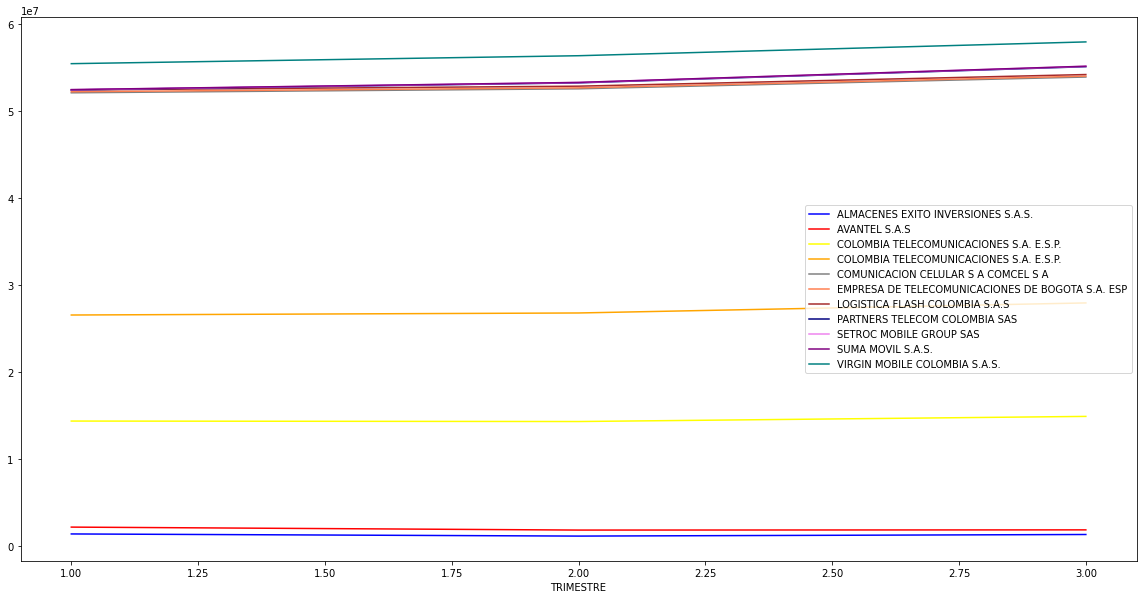

In [ ]:
df4.plot(x = 'TRIMESTRE', 
            y= ['ALMACENES EXITO INVERSIONES S.A.S.','AVANTEL S.A.S','COLOMBIA TELECOMUNICACIONES S.A. E.S.P.','COLOMBIA TELECOMUNICACIONES S.A. E.S.P.','COMUNICACION CELULAR S A COMCEL S A','EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP','LOGISTICA FLASH COLOMBIA S.A.S','PARTNERS TELECOM COLOMBIA SAS','SETROC MOBILE GROUP SAS','SUMA MOVIL S.A.S.','VIRGIN MOBILE COLOMBIA S.A.S.'], 
            kind = 'line', stacked=True,
            color = ['blue', 'red', 'yellow', 'orange','grey','coral','brown','navy','violet','purple','teal'], 
            fontsize=10,
            figsize=(20,10))